In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib as plt

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving new_model.csv to new_model (1).csv
User uploaded file "new_model.csv" with length 26297 bytes


In [ ]:
df = pd.read_csv(r"new_model.csv")
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [ ]:
df.shape

(400, 14)

In [ ]:
df['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

In [ ]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [ ]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Class, Length: 400, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(320, 80, 320, 80)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [ ]:
 models = {
     'RandomForestClassifier' : RandomForestClassifier(),
     'GradientBoostingClassifier' : GradientBoostingClassifier(),
     'DecisionTreeClassifier' : DecisionTreeClassifier(),
     'XGBClassifier' : XGBClassifier(),
     'SVC' : SVC()
 }

In [ ]:
def chech_score(X_train, X_test, y_train, y_test):
  np.random.seed(42)
  model_scores = {}
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)

  return model_scores    

In [ ]:
models = chech_score(X_train=X_train, X_test= X_test, y_train=y_train, y_test=y_test)
models

{'RandomForestClassifier': 1.0,
 'GradientBoostingClassifier': 1.0,
 'DecisionTreeClassifier': 0.9875,
 'XGBClassifier': 1.0,
 'SVC': 0.65}

In [ ]:
fit_model = pd.DataFrame()
fit_model['Model_Name'] = models.keys()
fit_model['Accuracy'] = models.values()
fit_model

,Model_Name,Accuracy
0,RandomForestClassifier,1.0000
1,GradientBoostingClassifier,1.0000
2,DecisionTreeClassifier,0.9875
3,XGBClassifier,1.0000
4,SVC,0.6500


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,classification_report, confusion_matrix


In [ ]:
# np.random.seed(42)
ideal_model = RandomForestClassifier()
ideal_model.fit(X_train, y_train)
ideal_model.score(X_test, y_test)


1.0

In [ ]:
y_pred = ideal_model.predict(X_test)


In [ ]:
print(f"Accuracy : {accuracy_score(y_pred, y_test)*100:.2f}%")
print(f'precision_score : {precision_score(y_pred, y_test)}')
print(f'recall_score : {recall_score(y_pred, y_test)}')
print(f'f1_score : {f1_score(y_pred, y_test)}')
print(confusion_matrix(y_pred, y_test))

Accuracy : 100.00%
precision_score : 1.0
recall_score : 1.0
f1_score : 1.0
[[28  0]
 [ 0 52]]


<Axes: >

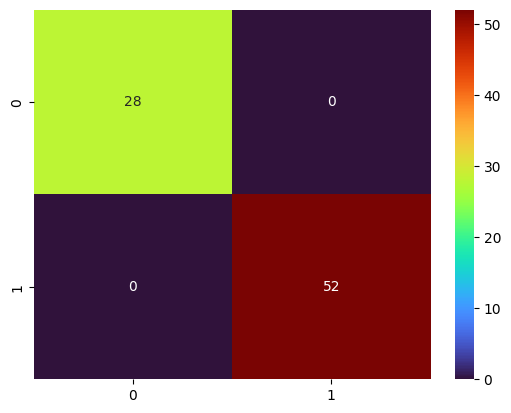

In [ ]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='turbo')


In [ ]:
features = [80.0,	1.020,	0.0,	0.0,	1.0,	49.0,	0.5,	150.0,	4.9,	15.7,	6700.0,	4.9,	0.0	]
features

[80.0, 1.02, 0.0, 0.0, 1.0, 49.0, 0.5, 150.0, 4.9, 15.7, 6700.0, 4.9, 0.0]

In [ ]:
fet_pred = np.array([features])
fet_pred

array([[8.00e+01, 1.02e+00, 0.00e+00, 0.00e+00, 1.00e+00, 4.90e+01,
        5.00e-01, 1.50e+02, 4.90e+00, 1.57e+01, 6.70e+03, 4.90e+00,
        0.00e+00]])

In [ ]:
pred = ideal_model.predict(fet_pred)
pred

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
if pred[0] == 0:
  print('Patients has no kidney Problem')

else:
  print('Patients has kidney Problem')  

Patients has no kidney Problem


In [ ]:
if pred[0] == 1:
  print('Patients has no kidney Problem')

else:
  print('Patients has kidney Problem')  

Patients has kidney Problem


In [ ]:
ideal_model.predict(pd.DataFrame([features],columns=['Bp','Sg','Al','Su','Rbc','Bu','Sc','Sod','Pot','Hemo','Wbcc','Rbcc','Htn']))

array([0])

In [ ]:
import pickle as pkl